## 가위바위보 분류기를 만들자

### 데이터 준비

In [57]:
#라이브러리 버전 확인 
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


1. 데이터 만들기
- 구글의 teachable machine 사용 
- 가위,바위,보 각 100장의 (224, 224, 3)이미지를 만들기 

2. 데이터 불러오기 _Resize하기
- 숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만듦
-PIL 라이브러리 사용

In [58]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")


PIL 라이브러리 import 완료!


In [60]:

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")     

	print(len(images), " images to be resized.")

#     # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# # 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

515  images to be resized.
515  images resized.
가위 이미지 resize 완료!


In [61]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock/rock"


# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

515  images to be resized.
515  images resized.


In [62]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

515  images to be resized.
515  images resized.


3. load_data()함수 만들기
- 입력으로 이미지가 있는 폴더 위치를 받음
- 가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링

In [73]:
# 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수
import numpy as np

def load_data(img_path, number_of_data=1545):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1545 입니다.
x_train shape: (1545, 28, 28, 3)
y_train shape: (1545,)


라벨:  0


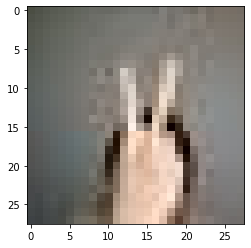

In [74]:
# 이미지 abs불러오기
import matplotlib.pyplot as plt

plt.imshow(x_train[11])
print('라벨: ', y_train[11])

### 딥러닝 네트워크 설계하기


In [81]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 128)             

### 딥러닝 네트워크 학습시키기


In [90]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)


Epoch 1/20
49/49 [==============================] - 3s 41ms/step - loss: 0.1715 - accuracy: 0.9430
Epoch 2/20
49/49 [==============================] - 2s 41ms/step - loss: 0.0538 - accuracy: 0.9838
Epoch 3/20
49/49 [==============================] - 2s 41ms/step - loss: 0.0274 - accuracy: 0.9968
Epoch 4/20
49/49 [==============================] - 2s 42ms/step - loss: 0.0172 - accuracy: 0.9981
Epoch 5/20
49/49 [==============================] - 2s 40ms/step - loss: 0.0319 - accuracy: 0.9935
Epoch 6/20
49/49 [==============================] - 2s 41ms/step - loss: 0.0100 - accuracy: 0.9987
Epoch 7/20
49/49 [==============================] - 2s 41ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 8/20
49/49 [==============================] - 2s 41ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 9/20
49/49 [==============================] - 2s 42ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 10/20
49/49 [==============================] - 2s 41ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 11/

### 얼마나 잘 만들었는지 확인하기(테스트)


1. 테스트데이터 x_test, y_test 만들기 

In [88]:
# # x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.

test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

resize_images(test_image_dir_path + "/scissor")
resize_images(test_image_dir_path + "/rock")
resize_images(test_image_dir_path + "/paper")


(x_test, y_test) = load_data(test_image_dir_path, number_of_data=300)
x_test_norm = x_test.astype('float32') / 255.0
x_test_norm.shape

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 0 입니다.


(300, 28, 28, 3)

2. test_accuracy를 측정


In [89]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 1.1031 - accuracy: 0.0000e+00
test_loss: 1.1030951738357544 
test_accuracy: 0.0


### 더 좋은 네트워크 만들어보기


1. 학습데이터셋 추가
 가위,바위,보 데이터넷 515개로 변경
  
    

2. 하이퍼파라미터 조정
n_channel_1=32
n_channel_2=32
n_dense=32
n_train_epoch=10


|n_channel_1|n_channel_2|n_dense|n_train_epoch|accuracy|
|---|---|---|---|---|
|32|32|32|10|0.4099999964237213|
|16|32|32|10|0.3566666543483734|
|64|32|32|10|0.3499999940395355|
|32|64|32|10|0.3100000023841858|



In [79]:
n_channel_1=32
n_channel_2=32
n_dense=32
n_train_epoch=20


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 3, 3, 128)         36992     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 128)             

In [51]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=n_train_epoch)


Epoch 1/10
10/10 [==============================] - 1s 38ms/step - loss: 7.1921 - accuracy: 0.4200
Epoch 2/10
10/10 [==============================] - 0s 40ms/step - loss: 1.0816 - accuracy: 0.5367
Epoch 3/10
10/10 [==============================] - 0s 40ms/step - loss: 0.9981 - accuracy: 0.5500
Epoch 4/10
10/10 [==============================] - 0s 40ms/step - loss: 0.5551 - accuracy: 0.7700
Epoch 5/10
10/10 [==============================] - 0s 37ms/step - loss: 0.3905 - accuracy: 0.8633
Epoch 6/10
10/10 [==============================] - 0s 37ms/step - loss: 0.2508 - accuracy: 0.9633
Epoch 7/10
10/10 [==============================] - 0s 38ms/step - loss: 0.1755 - accuracy: 0.9733
Epoch 8/10
10/10 [==============================] - 0s 38ms/step - loss: 0.1248 - accuracy: 0.9900
Epoch 9/10
10/10 [==============================] - 0s 37ms/step - loss: 0.0800 - accuracy: 0.9967
Epoch 10/10
10/10 [==============================] - 0s 41ms/step - loss: 0.0646 - accuracy: 1.0000


In [52]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 1.7889 - accuracy: 0.3100
test_loss: 1.7888669967651367 
test_accuracy: 0.3100000023841858


내 데이터만 가지고 학습을 시켰을때는 accuracy 측정이 되었는데 개선을 위해 데이터를 추가한 이후 accuracy 측정이 안되었다. 
테스트 이후에 코드에 대해서 재학습이 필요하다. 